**Call Volume Forecast**

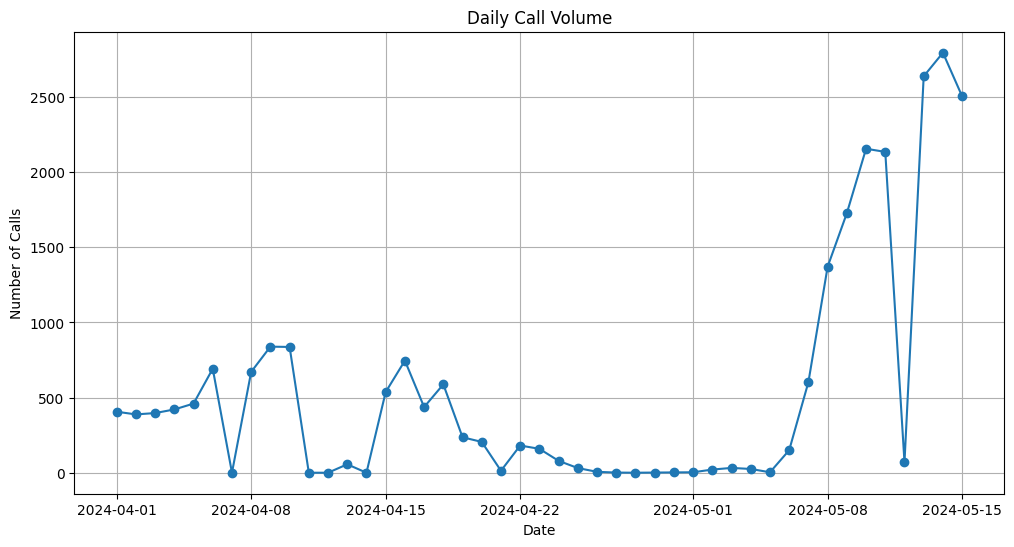

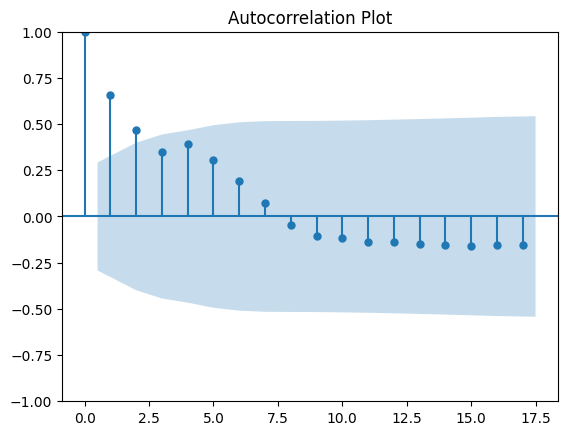

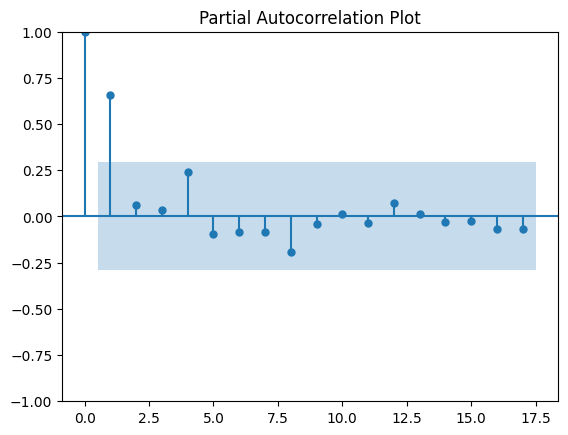

Forecasted Values for the next 30 days:
Day 1 (index 45): 2407.876052607441
Day 2 (index 46): 2398.263201945626
Day 3 (index 47): 2397.3117692626765
Day 4 (index 48): 2397.21760113482
Day 5 (index 49): 2397.2082808366395
Day 6 (index 50): 2397.2073583593624
Day 7 (index 51): 2397.2072670570983
Day 8 (index 52): 2397.2072580204494
Day 9 (index 53): 2397.2072571260464
Day 10 (index 54): 2397.207257037523
Day 11 (index 55): 2397.2072570287614
Day 12 (index 56): 2397.2072570278942
Day 13 (index 57): 2397.2072570278083
Day 14 (index 58): 2397.2072570277996
Day 15 (index 59): 2397.2072570277987
Day 16 (index 60): 2397.2072570277987
Day 17 (index 61): 2397.2072570277987
Day 18 (index 62): 2397.2072570277987
Day 19 (index 63): 2397.2072570277987
Day 20 (index 64): 2397.2072570277987
Day 21 (index 65): 2397.2072570277987
Day 22 (index 66): 2397.2072570277987
Day 23 (index 67): 2397.2072570277987
Day 24 (index 68): 2397.2072570277987
Day 25 (index 69): 2397.2072570277987
Day 26 (index 70): 2397.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_excel('/content/Data Analyst _ Sample Data _HDM.xlsx')
df['Created At'] = pd.to_datetime(df['Created At'])

daily_calls = df.groupby(pd.Grouper(key='Created At', freq='D')).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.plot(daily_calls['Created At'], daily_calls['count'], marker='o', linestyle='-')
plt.title('Daily Call Volume')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

plot_acf(daily_calls['count'])
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(daily_calls['count'])
plt.title('Partial Autocorrelation Plot')
plt.show()

model = ARIMA(daily_calls['count'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

print("Forecasted Values for the next 30 days:")
for i, value in enumerate(forecast):
    print(f"Day {i+1} (index {45+i}): {value}")

mean_calls_per_day = forecast.mean()
total_calls = forecast.sum()

print("\nMean calls per day:", mean_calls_per_day)
print("Total calls for the next 30 days:", total_calls)


**Lead Conversion Forecast**


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_excel('/content/agent_metrics (1).xlsx')

df['Calls_Per_Hour'] = (df['Calls_Completed'] / df['Agent_Call_Duration']) * 60
df['Success_Rate'] = (df['Leads_Interest'] / df['Calls_Connected']) * 100
df['Average_Handling_Time'] = df['Customer_Call_Duration'] / df['Calls_Completed']
df['Average_Handling_Time'] = df['Average_Handling_Time'] / 60

df.set_index('Agent Id', inplace=True)

def arima_forecast(series):
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test) + 30)
    mse = mean_squared_error(test, forecast[:len(test)])
    return forecast[-30:]

calls_per_hour_forecast = arima_forecast(df['Calls_Per_Hour'])
success_rate_forecast = arima_forecast(df['Success_Rate'])
avg_handling_time_forecast = arima_forecast(df['Average_Handling_Time'])

from tabulate import tabulate

forecast_df = pd.DataFrame({
    'Calls Per Hour Forecast': calls_per_hour_forecast,
    'Success Rate Forecast': success_rate_forecast,
    'Average Handling Time Forecast (sec)': avg_handling_time_forecast
})

print(tabulate(forecast_df, headers='keys', tablefmt='pretty'))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Mean Squared Error: 0.010142368667453733


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Mean Squared Error: 242.543843279249
Mean Squared Error: 0.05100499138435004
+----+-------------------------+-----------------------+--------------------------------------+
|    | Calls Per Hour Forecast | Success Rate Forecast | Average Handling Time Forecast (sec) |
+----+-------------------------+-----------------------+--------------------------------------+
| 23 |   0.5339691670628794    |   48.92578942790402   |          0.6337201977666258          |
| 24 |   0.5476167558865759    |   45.65520248839509   |          0.6920468937741778          |
| 25 |   0.5530982462093188    |   33.0926208646939    |          0.6672966619021699          |
| 26 |   0.5494352126528531    |   33.89857456344718   |          0.6599154830074166          |
| 27 |   0.5378028059806721    |   43.75077820141749   |          0.6907465540179267          |
| 28 |   0.5464459202771887    |   44.30767264142767   |          0.6476888435900239          |
| 29 |   0.5513635699513666    |   40.90786120672707   |   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


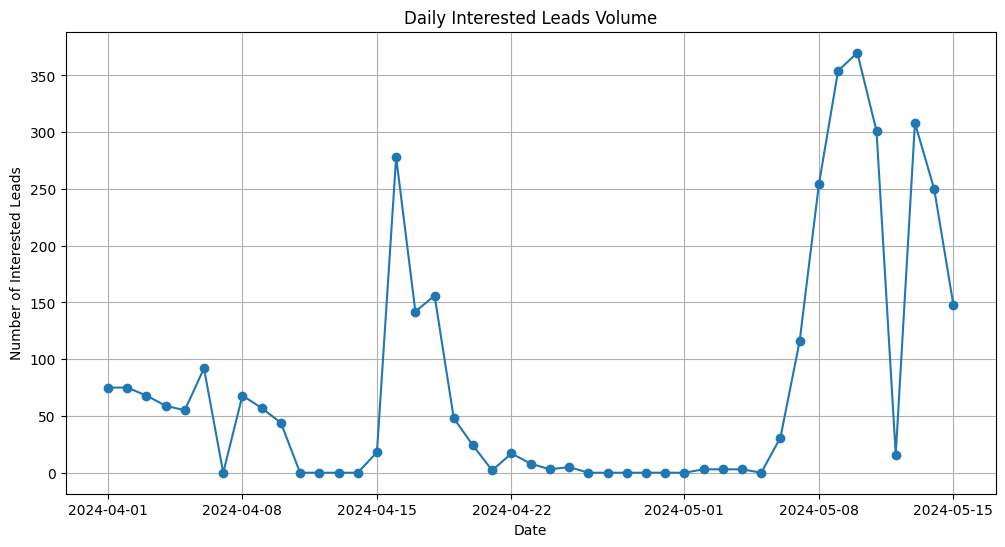

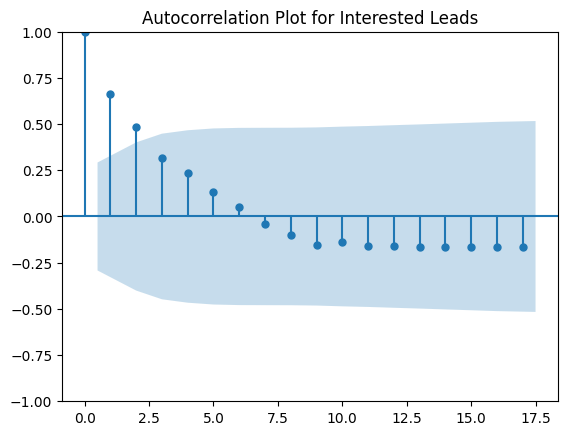

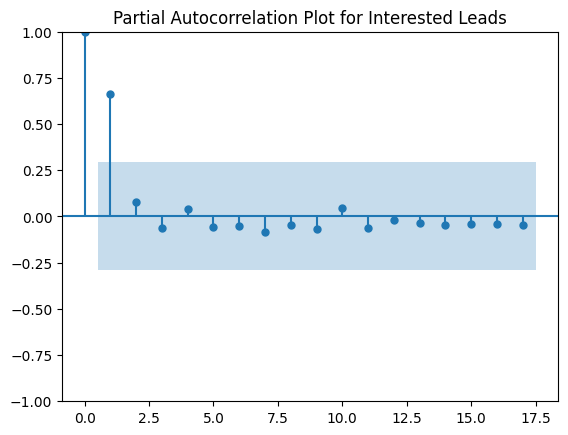

Forecasted Interested Leads for the next 30 days:
Day 1 (index 45): 135.4330857143041
Day 2 (index 46): 127.13443816665847
Day 3 (index 47): 121.6543696665946
Day 4 (index 48): 118.0355690616801
Day 5 (index 49): 115.64586940409792
Day 6 (index 50): 114.06781493884414
Day 7 (index 51): 113.02573591129514
Day 8 (index 52): 112.33759191907697
Day 9 (index 53): 111.88317134107172
Day 10 (index 54): 111.58309161350046
Day 11 (index 55): 111.3849319190286
Day 12 (index 56): 111.25407581344962
Day 13 (index 57): 111.16766409176759
Day 14 (index 58): 111.1106015220769
Day 15 (index 59): 111.07291986504794
Day 16 (index 60): 111.04803652586176
Day 17 (index 61): 111.03160464314018
Day 18 (index 62): 111.02075373732906
Day 19 (index 63): 111.01358826767978
Day 20 (index 64): 111.00885650093252
Day 21 (index 65): 111.00573184649306
Day 22 (index 66): 111.00366845962563
Day 23 (index 67): 111.00230588803662
Day 24 (index 68): 111.00140610459586
Day 25 (index 69): 111.00081192646475
Day 26 (index 

In [ ]:


interested_leads = df[df['Lead Status'] == 'Interested']
daily_interested_leads = interested_leads.groupby(pd.Grouper(key='Created At', freq='D')).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.plot(daily_interested_leads['Created At'], daily_interested_leads['count'], marker='o', linestyle='-')
plt.title('Daily Interested Leads Volume')
plt.xlabel('Date')
plt.ylabel('Number of Interested Leads')
plt.grid(True)
plt.show()

plot_acf(daily_interested_leads['count'])
plt.title('Autocorrelation Plot for Interested Leads')
plt.show()

plot_pacf(daily_interested_leads['count'])
plt.title('Partial Autocorrelation Plot for Interested Leads')
plt.show()

model_interested = ARIMA(daily_interested_leads['count'], order=(1, 1, 1))
model_interested_fit = model_interested.fit()

forecast_interested = model_interested_fit.forecast(steps=30)

print("Forecasted Interested Leads for the next 30 days:")
for i, value in enumerate(forecast_interested):
    print(f"Day {i+1} (index {45+i}): {value}")

mean_interested_leads_per_day = forecast_interested.mean()
total_interested_leads = forecast_interested.sum()

print("\nMean Interested Leads per day:", mean_interested_leads_per_day)
print("Total Interested Leads for the next 30 days:", total_interested_leads)


**Agent Efficiency Forecast**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

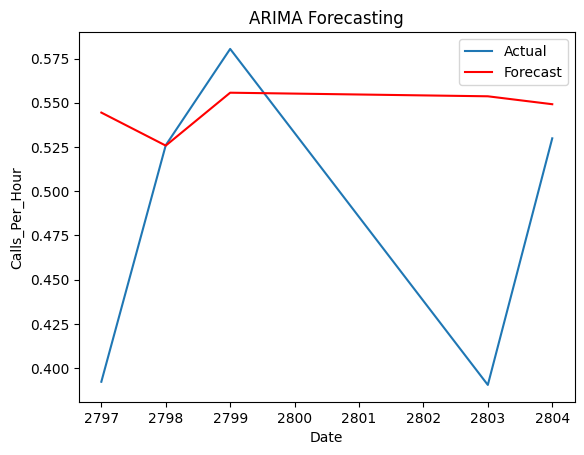

Mean Squared Error: 0.010142368667453733
Predicted Values for the next 30 days:
23    0.533969
24    0.547617
25    0.553098
26    0.549435
27    0.537803
28    0.546446
29    0.551364
30    0.547705
31    0.541745
32    0.546530
33    0.548608
34    0.547311
35    0.544668
36    0.545776
37    0.547165
38    0.547708
39    0.545586
40    0.545371
41    0.547047
42    0.547481
43    0.545703
44    0.545789
45    0.546945
46    0.546871
47    0.546052
48    0.546224
49    0.546556
50    0.546609
51    0.546432
52    0.546265
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

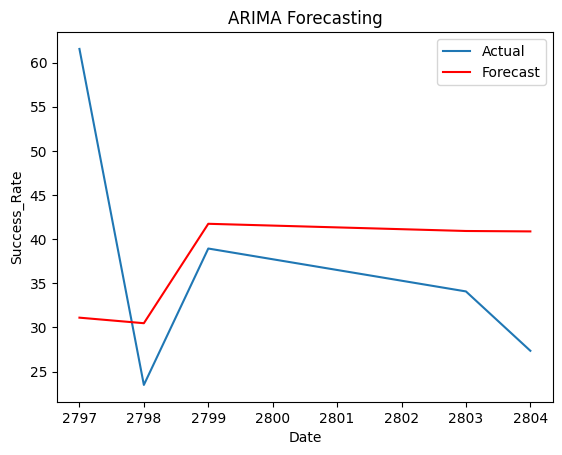

Mean Squared Error: 242.543843279249
Predicted Values for the next 30 days:
23    48.925789
24    45.655202
25    33.092621
26    33.898575
27    43.750778
28    44.307673
29    40.907861
30    43.011426
31    42.167899
32    36.370555
33    37.366264
34    43.890248
35    44.126231
36    40.214975
37    40.348826
38    41.135077
39    39.037381
40    39.505648
41    43.027899
42    42.941663
43    39.894851
44    39.687161
45    41.074006
46    40.575648
47    40.460712
48    42.017159
49    41.906813
50    40.013345
51    39.891256
52    41.186329
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

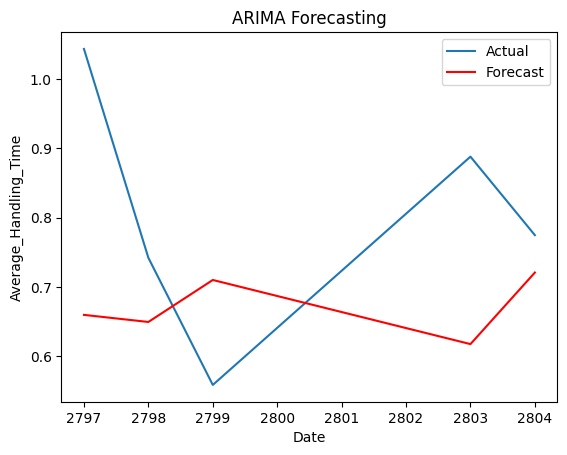

Mean Squared Error: 0.05100499138435004
Predicted Values for the next 30 days:
23    0.633720
24    0.692047
25    0.667297
26    0.659915
27    0.690747
28    0.647689
29    0.691965
30    0.655605
31    0.678519
32    0.670690
33    0.665093
34    0.680127
35    0.660670
36    0.679742
37    0.664761
38    0.673551
39    0.671370
40    0.667924
41    0.675107
42    0.666415
43    0.674566
44    0.668458
45    0.671748
46    0.671326
47    0.669410
48    0.672782
49    0.668936
50    0.672391
51    0.669930
52    0.671122
Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df = pd.read_excel('/content/agent_metrics (1).xlsx')

df['Calls_Per_Hour'] = (df['Calls_Completed'] / df['Agent_Call_Duration']) * 60
df['Success_Rate'] = (df['Leads_Interest'] / df['Calls_Connected']) * 100
df['Average_Handling_Time'] = df['Customer_Call_Duration'] / df['Calls_Completed']
df['Average_Handling_Time'] = df['Average_Handling_Time'] / 60

df.set_index('Agent Id', inplace=True)

def arima_forecast(series):
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test) + 30)

    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, forecast[:len(test)], label='Forecast', color='red')
    plt.title('ARIMA Forecasting')
    plt.xlabel('Date')
    plt.ylabel(series.name)
    plt.legend()
    plt.show()

    mse = mean_squared_error(test, forecast[:len(test)])
    print('Mean Squared Error:', mse)

    print("Predicted Values for the next 30 days:")
    print(forecast[-30:])

arima_forecast(df['Calls_Per_Hour'])
arima_forecast(df['Success_Rate'])
arima_forecast(df['Average_Handling_Time'])


**Resource Allocation Forecast**

Total Call Volume per Day: 71928.05844394471
Agents Needed per Day: 936.5632609888635


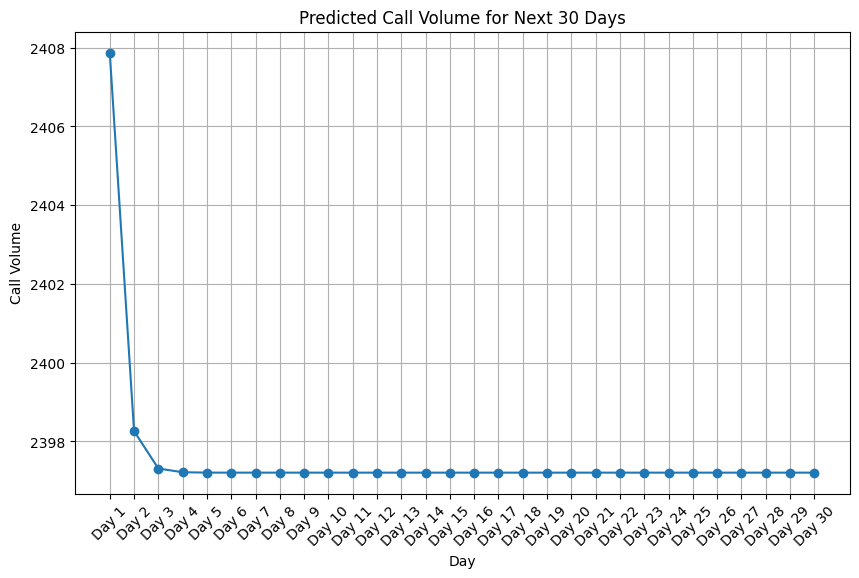

In [ ]:
import pandas as pd

predicted_values = {
    'Day 1': 2407.876052607441,
    'Day 2': 2398.263201945626,
    'Day 3': 2397.3117692626765,
    'Day 4': 2397.21760113482,
    'Day 5': 2397.2082808366395,
    'Day 6': 2397.2073583593624,
    'Day 7': 2397.2072670570983,
    'Day 8': 2397.2072580204494,
    'Day 9': 2397.2072571260464,
    'Day 10': 2397.207257037523,
    'Day 11': 2397.2072570287614,
    'Day 12': 2397.2072570278942,
    'Day 13': 2397.2072570278083,
    'Day 14': 2397.2072570277996,
    'Day 15': 2397.2072570277987,
    'Day 16': 2397.2072570277987,
    'Day 17': 2397.2072570277987,
    'Day 18': 2397.2072570277987,
    'Day 19': 2397.2072570277987,
    'Day 20': 2397.2072570277987,
    'Day 21': 2397.2072570277987,
    'Day 22': 2397.2072570277987,
    'Day 23': 2397.2072570277987,
    'Day 24': 2397.2072570277987,
    'Day 25': 2397.2072570277987,
    'Day 26': 2397.2072570277987,
    'Day 27': 2397.2072570277987,
    'Day 28': 2397.2072570277987,
    'Day 29': 2397.2072570277987,
    'Day 30': 2397.2072570277987
}

predicted_df = pd.DataFrame(list(predicted_values.items()), columns=['Day', 'Predicted Call Volume'])

total_call_volume_per_day = predicted_df['Predicted Call Volume'].sum()
average_handling_time_per_call = 5

working_hours_per_day = 8
agent_utilization_rate = 0.8
agent_capacity_per_day = working_hours_per_day * 60 * agent_utilization_rate / average_handling_time_per_call
agents_needed_per_day = total_call_volume_per_day / agent_capacity_per_day

print("Total Call Volume per Day:", total_call_volume_per_day)
print("Agents Needed per Day:", agents_needed_per_day)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(predicted_df['Day'], predicted_df['Predicted Call Volume'], marker='o', linestyle='-')
plt.title('Predicted Call Volume for Next 30 Days')
plt.xlabel('Day')
plt.ylabel('Call Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
